# Importing Modules

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydst
import pprint as pp
dst = pydst.Dst(lang='en')

# Importing Data

In [198]:
variables = dst.get_variables(table_id = 'OFF3K')

In [199]:
# pp.pprint(variables['values'][0])

In [200]:
OFF3K = dst.get_data(table_id = 'OFF3K', variables={'UI':['1.8','1.13','1.16','1.17','2.13','2.16','2.17','2.18','2.19'],'Tid':['*']})

In [201]:
# pp.pprint(OFF3K['UI'][0:9])

In [202]:
names = OFF3K['UI'][0:9]

# Cleaning Data

In [203]:
columns_dict = {}
columns_dict['UI'] = 'variable'
columns_dict['TID'] = 'time'
columns_dict['INDHOLD'] = 'mio. DKK'
OFF3K.rename(columns = columns_dict,inplace=True)

In [204]:
# Initialize empty dictionary
rename_dict = {}
# List of wanted names
wanted_names = ['1.2: Capital accumulation',
                '1.3: Capital expenses',
                '1.4: Current and capital expenditure (1+3)',
                '1.1: Current expenditure',
                '2.1: Current revenue',
                '2.2: Capital revenue',
                '2.3: Current plus capital revenue (1+2)',
                '2.4: Currents surplus=Gross saving (2.1-1.1)',
                '2.5: Overall surplus=Net lending/borrowing (2.3-1.4)']
# Create rename dictionary for variable names
for name, wantedname in zip(names,wanted_names):
    rename_dict[name] = wantedname
# Rename the variables
for key,value in rename_dict.items():
    OFF3K.variable.replace(key, value, inplace=True)

In [206]:
I = OFF3K['variable']=='1.2: Capital accumulation'

## Create subsetting booleans

In [225]:
# Initializes list of lists for subsetting
Ilist = [[] for eachlist in range(9)]

In [235]:
# List i in Ilist is the true/false boolean for name i in wanted_names
for number, name in enumerate(wanted_names):
    Ilist[number] = OFF3K['variable']==name

In [287]:
# For os så vi ved hvilken hører til hvad
for number, i in enumerate(wanted_names):
    print(f'Index {number}: {i[5:]}')

Index 0: Capital accumulation
Index 1: Capital expenses
Index 2: Current and capital expenditure (1+3)
Index 3: Current expenditure
Index 4: Current revenue
Index 5: Capital revenue
Index 6: Current plus capital revenue (1+2)
Index 7: Currents surplus=Gross saving (2.1-1.1)
Index 8: Overall surplus=Net lending/borrowing (2.3-1.4)


In [302]:
# Med DST indeksering
#for number, i in enumerate(wanted_names):
#    print(f'Index {number}: {i}')

In [301]:
# Bevis for at det faktisk passer
#for i in range(9):
#    print(OFF3K[Ilist[i]][:1])

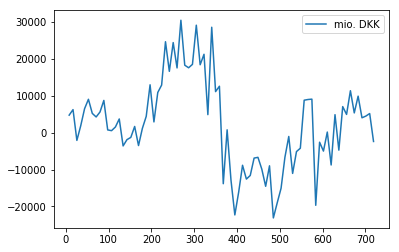

In [300]:
OFF3K[Ilist[8]].plot()